Make neccesary imports

In [29]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])



### Sample binary classification problem with two informative features

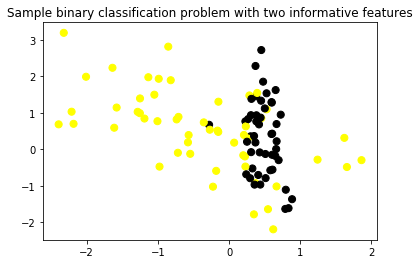

In [16]:
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()



### Linear Support Vector Machines

In [18]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state =0)

In [79]:
this_C= 1.0
clf = SVC(kernel = 'linear', C=1.0).fit(X_train, y_train)


In [31]:
w = clf.coef_
b = clf.intercept_
#Choosing Series of feature1 values for plotting decision boundary
x0 = np.linspace(np.min(X_C2), np.max(X_C2), 200)
w0= w[0][0]
w1 = w[0][1]
# Feature 1 two values corresponding to feature 1
x1 = (w0*x0)/w1-(b/w1)

w:  [[1.71279818 0.18321389]]
b:  [-0.05424696]


1.7127981779888728
0.1832138924216986


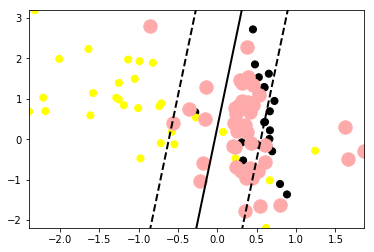

In [75]:
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2, marker= 'o', s=50, cmap=cmap_bold) 
plt.plot(x0, x1, "k-", linewidth =2) #Decision boundary
plt.axis([np.min(X_C2[:, 0]), np.max(X_C2[:, 0]), np.min(X_C2[:, 1]), np.max(X_C2[:, 1])]) # Defining limits
gutter_up = x1+(1/w[0][1])
gutter_down = x1-(1/w[0][1])
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)
svs = clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plt.show()

In [70]:
gutter_up = x1+(1/w[0][1])
gutter_down = x1-(1/w[0][1])

In [69]:
w[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [76]:
from sklearn.preprocessing import StandardScaler
xscaled = StandardScaler().fit_transform(X_C2)
clf.fit(xscaled, y_C2)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

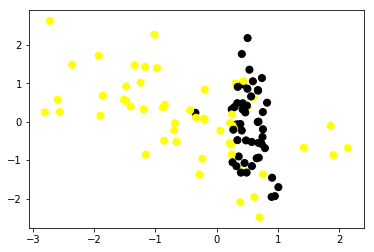

In [77]:
plt.scatter(xscaled[:, 0], xscaled[:, 1], c=y_C2, marker= 'o', s=50, cmap=cmap_bold) 
plt.plot(x0, x1, "k-", linewidth =2) #Decision boundary
plt.axis([np.min(X_C2[:, 0]), np.max(X_C2[:, 0]), np.min(X_C2[:, 1]), np.max(X_C2[:, 1])]) # Defining limits
gutter_up = x1+(1/w[0][1])
gutter_down = x1-(1/w[0][1])
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)
svs = clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plt.show()